# Imports

In [ ]:
import numpy as np
import itertools
import scipy
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
np.random.seed(1234)
from sklearn import datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

# Utilities

In [ ]:
def logsumexp(Z):                                              # dimension C x N
  Zmax = np.max(Z,axis=0)[None,:]                              # max over C
  log_sum_exp = Zmax + np.log(np.sum(np.exp(Z - Zmax), axis=0))
  return log_sum_exp

def evaluate_acc(y_test, y_pred):
    accuracy = np.sum(y_pred == y_test)/y_test.shape[0]
    print(f'test accuracy: {accuracy}')
    return accuracy

# Multinomial Naive Bayes (Class Implementation)

In [ ]:
from functools import total_ordering
import numpy as np
import itertools
import scipy
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer

class MultinomialNaiveBayes:
    
    def __init__(self):
        #self.alpha = alpha #for laplace smoothing for counts
        return
    
    def fit(self, x, y, alpha=1, alpha_prior=1):
        self.alpha = alpha  #for laplace smoothing for counts
        self.alpha_prior = alpha_prior

        N, D = x.shape
        C = np.max(y) + 1

        self.C = C
        self.D = D
        self.N = N

        print("N, D, C:", N, D, C)

        log_theta_x = np.zeros((C,D)) #log likelihood of each feature p(x_i|y)
        log_theta_c = np.zeros(C) # log priors
        
        #compute likelihoods for each class, for each word (and the prior while we're at it)
        for c in range(C):

            #get all rows of data belonging to c, gather some data about it
            x_c = x[y == c]                       #slice all the elements from class c
            num_class_elements = x_c.shape[0]     #get number of elements of class c

            #calculate p(x_i|y)  the likelihood for each word in this class
            #sum of all word counts in this class, from our one class data splice
            occurences = np.sum(x_c, axis =0) # D 1d matrix
                        
            #LAPLACE SMOOTHING alpha + 1
            occurences = occurences + self.alpha if self.alpha > 0 else occurences
            
            #count all words in class
            total_words_in_class = np.sum(occurences, axis=1) 
            #SMOOTH, our vocabular size is just the number of features bc of how we processed data
            total_words_in_class = total_words_in_class + (D * self.alpha) if self.alpha > 0 else total_words_in_class

            #calculate frequency
            frequency = np.apply_along_axis((lambda x : x/total_words_in_class),axis=1, arr=occurences)

            #now do it in the log domin
            log_total_words_in_class = np.log(total_words_in_class)
            log_frequency = np.apply_along_axis((lambda x : np.log(x) - log_total_words_in_class) ,axis=1, arr=occurences)
            log_theta_x[c,:] = log_frequency

            #smooth prior
            num_class_elements = num_class_elements + self.alpha_prior if self.alpha_prior > 0 else num_class_elements
            total_elements = N + (D * self.alpha_prior) if self.alpha_prior > 0 else total_elements

            log_theta_c[c] = np.log(num_class_elements) - np.log(total_elements)

        self.log_theta_x = log_theta_x
        self.log_theta_c = log_theta_c 
        return self

    def predict(self, xt):
        Ntest, Dtest = xt.shape

        y_pred = np.zeros((Ntest))

        for n in range(Ntest):
          
            instance = xt[n].toarray() #sparse array
          
            log_posteriors = np.zeros(self.C)

            for c in range(self.C):
                log_prior = self.log_theta_c[c]

                #work in log domain, likelihoods are our theta params
                log_likelihoods = self.log_theta_x[c]

                #log domain: log(theta^count) = count * log(theta)
                #perform the likelihood calculation ONLY where instnace[i] != 0
                log_likelihoods =np.where((instance != 0), np.multiply(instance, log_likelihoods), 0)
                log_likelihood_sum = np.sum(log_likelihoods)

                log_posteriors[c] = log_likelihood_sum + log_prior  

            y_pred[n] = np.argmax(log_posteriors)     

        return y_pred

#Data Loads

## 20 News Group (Count)

In [ ]:
FEATURE_NUM = None
import numpy as np
import math
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['alt.atheism',
'comp.graphics',
'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware',
'comp.sys.mac.hardware',
'comp.windows.x',
'misc.forsale',
'rec.autos',
'rec.motorcycles',
'rec.sport.baseball',
'rec.sport.hockey',
'sci.crypt',
'sci.electronics',
'sci.med',
'sci.space',
'soc.religion.christian',
'talk.politics.guns',
'talk.politics.mideast',
'talk.politics.misc',
'talk.religion.misc']

x, y  = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'), return_X_y=True, random_state=42)

#VECTORIZATION
#COUNT
vectorizer_count = CountVectorizer(stop_words='english', strip_accents='ascii', max_features=FEATURE_NUM)
count_newsgroup_x = vectorizer_count.fit_transform(x)
words_as_features_count = vectorizer_count.get_feature_names_out()

#TEST TRAIN SPLIT
TRAIN_PERCENTAGE = 80 
#Count Data
num_instances_count = count_newsgroup_x.shape[0]
splitIndex = math.floor(num_instances_count*(TRAIN_PERCENTAGE/100))
count_newsgroup_x_train, count_newsgroup_x_test = count_newsgroup_x[:splitIndex], count_newsgroup_x[splitIndex:]
count_newsgroup_y_train, count_newsgroup_y_test = y[:splitIndex], y[splitIndex:]

## Sentiment 140 (Count)

## Get x_train, x_test, y_train, y_test 

This process involved saving matrices to files and reuploading them for memory concerns as well as upload speeds of the entire data set.


In [ ]:
import numpy as np
from google.colab import files
import scipy
from scipy import sparse

#uncomment for prompt to uploadfile
#uploaded = files.upload()

#COUNT VECTORIZED
count_sentiment_x_train = scipy.sparse.load_npz(file = '/content/count_sentiment_x_train.npz')
count_sentiment_y_train = np.load(file = '/content/count_sentiment_y_train.npy')
count_sentiment_x_test = scipy.sparse.load_npz(file = '/content/count_sentiment_x_test.npz')
count_sentiment_y_test = np.load(file = '/content/count_sentiment_y_test.npy')

count_sentiment = (count_sentiment_x_train,  count_sentiment_y_train, count_sentiment_x_test, count_sentiment_y_test)

#TFID
tfid_sentiment_x_train = scipy.sparse.load_npz(file = '/content/tfid_sentiment_x_train.npz')
tfid_sentiment_y_train = np.load(file = '/content/tfid_sentiment_y_train.npy')
tfid_sentiment_x_test = scipy.sparse.load_npz(file = '/content/tfid_sentiment_x_test.npz')
tfid_sentiment_y_test = np.load(file = '/content/tfid_sentiment_y_test.npy')

tfid_sentiment = (tfid_sentiment_x_train, tfid_sentiment_y_train, tfid_sentiment_x_test, tfid_sentiment_y_test)

# Experiments



## 20 News Group

In [ ]:
#variables used
#count_newsgroup_x_train, count_newsgroup_x_test, count_newsgroup_y_train, count_newsgroup_y_test
ALPHA = 1
ALPHA_PRIOR = 1

#create model object
model = MultinomialNaiveBayes()

#fit model (can pass an extra arg alpha = int for pseudocpunts)
model.fit(count_newsgroup_x_train, count_newsgroup_y_train, alpha=ALPHA, alpha_prior=ALPHA_PRIOR)

#predict
newsgroup_y_pred = model.predict(count_newsgroup_x_test)

#EVALUATION METRICS

#accuracy
evaluate_acc(count_newsgroup_y_test, newsgroup_y_pred)

#further report
print("report: ") 
newsgroup_class_report=classification_report(count_newsgroup_y_test, newsgroup_y_pred)
print(newsgroup_class_report)

N, D, C: 9051 101320 20
test accuracy: 0.6544410075121521
report: 
              precision    recall  f1-score   support

           0       0.93      0.36      0.52       102
           1       0.59      0.67      0.62       118
           2       1.00      0.05      0.10       118
           3       0.55      0.69      0.61       109
           4       0.83      0.64      0.72       102
           5       0.37      0.88      0.53       101
           6       0.85      0.67      0.75       115
           7       0.86      0.63      0.73       117
           8       0.89      0.63      0.74       108
           9       0.95      0.74      0.83       116
          10       0.89      0.82      0.85       125
          11       0.48      0.85      0.62       121
          12       0.80      0.43      0.56       119
          13       0.83      0.85      0.84       117
          14       0.79      0.75      0.77       140
          15       0.48      0.94      0.64       120
          16  

##Sentiment 140

In [ ]:
#Sentiment Experiment on Multinomial Bayes with count vectors
ALPHA = 5 # was 1 and replaced by the best one found by k folds
ALPHA_PRIOR = 1

#variables used:
#count_sentiment_x_train, count_sentiment_x_test, count_sentiment_y_train, count_sentiment_y_test

#create model object
model = MultinomialNaiveBayes()

#fit, hyperaparameters as constants above
model.fit(count_sentiment_x_train, count_sentiment_y_train, alpha = ALPHA, alpha_prior=ALPHA_PRIOR)

#predict
sentiment_y_pred = model.predict(count_sentiment_x_test)

#EVALUATION METRICS

#evaluate accuracy
evaluate_acc(count_sentiment_y_test, sentiment_y_pred)

#further report
print("report: ") 
sentiment_class_report=classification_report(count_sentiment_y_test, sentiment_y_pred)
print(sentiment_class_report)

N, D, C: 100000 93761 2
test accuracy: 0.7932960893854749
report: 
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       177
           1       0.81      0.77      0.79       181

    accuracy                           0.79       358
   macro avg       0.79      0.79      0.79       358
weighted avg       0.79      0.79      0.79       358



# Hyperparameter Estimation

20 News Group

N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7240 101320 20
N, D, C: 9051 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7240 101320 20
N, D, C: 9051 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7240 101320 20
N, D, C: 9051 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7240 101320 20
N, D, C: 9051 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7240 101320 20
N, D, C: 9051 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7240 101320 20
N, D, C: 9051 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7241 101320 20
N, D, C: 7240 101320 20
N, D, C: 9051 10

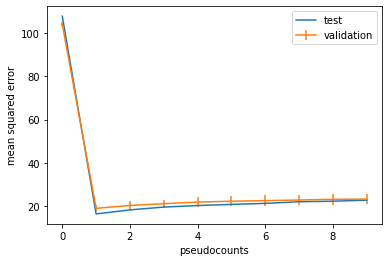

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, neighbors
np.random.seed(1234)

#define a function for the MSE loss
loss = lambda y, yh: np.mean((y-yh)**2)

num_folds = 5 
num_instances = count_newsgroup_x_train.shape[0]
n_test = num_instances // 5
pseudo_list  = range(0,10) # number of differnt parameter to be tried
x = count_newsgroup_x_train
y = count_newsgroup_y_train
x_test = count_newsgroup_x_test
y_test = count_newsgroup_y_test

    
def cross_validation_split(n, n_folds):
    #get the number of data samples in each split
    n_val = n // n_folds
    inds = np.random.permutation(n)
    inds = []
    for f in range(n_folds):
        tr_inds = []
        #get the validation indexes
        val_inds = list(range(f * n_val, (f+1)*n_val))
        #get the train indexes
        if f > 0:
            tr_inds = list(range(f*n_val))
        if f < n_folds - 1:
            tr_inds = tr_inds + list(range((f+1)*n_val, n))
        yield tr_inds, val_inds
        
def kfoldCV(num_folds, x, y):

  n_rest = x.shape[0]

  err_test, err_valid = np.zeros(len(pseudo_list)), np.zeros((len(pseudo_list), num_folds))
  for i, p in enumerate(pseudo_list):
      #Find the validation errors for num_folds splits for a given K
      for f, (tr, val) in enumerate(cross_validation_split(n_rest, num_folds)):
        model = MultinomialNaiveBayes()
        model = model.fit(x[tr], y[tr],p)
        err_valid[i, f] = loss(y[val], model.predict(x[val]))
      model = MultinomialNaiveBayes()
      model = model.fit(x, y, p)
      err_test[i]= loss(y_test, model.predict(x_test))
    
  plt.plot(pseudo_list, err_test,  label='test')
  plt.errorbar(pseudo_list, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='validation')
  plt.legend()
  plt.xlabel('pseudocounts')
  plt.ylabel('mean squared error')
  plt.show()

kfoldCV(num_folds, x, y)

Calculating best accuracy

In [ ]:
# chose hyperparameter = 1, with full training data
model = MultinomialNaiveBayes()
model.fit(count_newsgroup_x_train, count_newsgroup_y_train, alpha=1)

y_pred_100 = model.predict(count_newsgroup_x_test)
acc_100 = evaluate_acc(count_newsgroup_y_test, y_pred_100)

N, D, C: 9051 101320 20
test accuracy: 0.6544410075121521


N, D, C: 7240 101320 20
test accuracy: 0.6288113124171454
N, D, C: 5430 101320 20
test accuracy: 0.6137870083959346
N, D, C: 3620 101320 20
test accuracy: 0.5368979231109147
N, D, C: 1810 101320 20


No handles with labels found to put in legend.


test accuracy: 0.47856827220503756


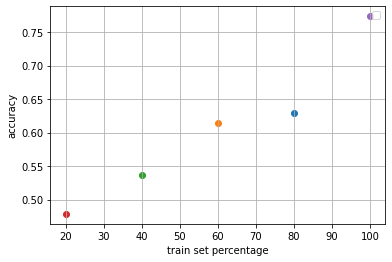

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, neighbors

train_port = [80, 60, 40, 20]
acc = np.zeros(len(train_port))

num_instances_count = count_newsgroup_x_train.shape[0]
for i, p in enumerate(train_port):    
  splitIndex = math.floor(num_instances_count*(p/100))
  count_newsgroup_x_train_port = count_newsgroup_x_train[:splitIndex]
  count_newsgroup_y_train_port = count_newsgroup_y_train[:splitIndex]
  model = MultinomialNaiveBayes()
  model.fit(count_newsgroup_x_train_port, count_newsgroup_y_train_port, alpha=1)
  y_pred = model.predict(count_newsgroup_x_test)
  acc[i] = evaluate_acc(count_newsgroup_y_test, y_pred)
  plt.scatter(p, acc[i], marker='o');

plt.scatter(100, acc_100, marker='o');
plt.legend()
plt.xlabel('train set percentage')
plt.ylabel('accuracy')
plt.grid(True) 
plt.show()

Sentiment 140

N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 100000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 100000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 100000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 100000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 100000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 100000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 80000 93761 2
N, D, C: 100000 93761 2
N, D, C: 80000 93761 2
N, D

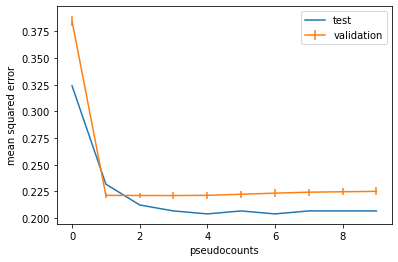

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, neighbors
np.random.seed(1234)

#define a function for the MSE loss
loss = lambda y, yh: np.mean((y-yh)**2)

num_folds = 5 
num_instances = tfid_sentiment_x_train.shape[0]
n_test = num_instances // 5
pseudo_list  = range(0,10) # number of differnt parameter to be tried
x = tfid_sentiment_x_train
y = tfid_sentiment_y_train
x_test = tfid_sentiment_x_test
y_test = tfid_sentiment_y_test

def cross_validation_split(n, n_folds):
    #get the number of data samples in each split
    n_val = n // n_folds
    inds = np.random.permutation(n)
    inds = []
    for f in range(n_folds):
        tr_inds = []
        #get the validation indexes
        val_inds = list(range(f * n_val, (f+1)*n_val))
        #get the train indexes
        if f > 0:
            tr_inds = list(range(f*n_val))
        if f < n_folds - 1:
            tr_inds = tr_inds + list(range((f+1)*n_val, n))
        yield tr_inds, val_inds
        
def kfoldCV(num_folds, x, y):

  n_rest = x.shape[0]

  err_test, err_valid = np.zeros(len(pseudo_list)), np.zeros((len(pseudo_list), num_folds))
  for i, p in enumerate(pseudo_list):
      #Find the validation errors for num_folds splits for a given K
      for f, (tr, val) in enumerate(cross_validation_split(n_rest, num_folds)):
        model = MultinomialNaiveBayes()
        model = model.fit(x[tr], y[tr],p)
        err_valid[i, f] = loss(y[val], model.predict(x[val]))
      model = MultinomialNaiveBayes()
      model = model.fit(x, y, p)
      err_test[i]= loss(y_test, model.predict(x_test))
    
  plt.plot(pseudo_list, err_test,  label='test')
  plt.errorbar(pseudo_list, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='validation')
  plt.legend()
  plt.xlabel('pseudocounts')
  plt.ylabel('mean squared error')
  plt.show()

kfoldCV(num_folds, x, y)

Calculate accuracy with 100% training set ( best accuracy)

In [ ]:
# chose hyperparameter = 3, with full training data
model = MultinomialNaiveBayes()
model.fit(count_sentiment_x_train, count_sentiment_y_train, alpha=5)

#returning probabilities an array of numbers y_pred representing the class predicted for each instance
y_pred_100 = model.predict(count_sentiment_x_test)
acc_100 = evaluate_acc(count_sentiment_y_test, y_pred_100)

N, D, C: 100000 93761 2
test accuracy: 0.7932960893854749


accuracy on 20% 40% 60 and 80% of the training set

N, D, C: 80000 93761 2
test accuracy: 0.7960893854748603
N, D, C: 60000 93761 2
test accuracy: 0.7932960893854749
N, D, C: 40000 93761 2
test accuracy: 0.7849162011173184
N, D, C: 20000 93761 2


No handles with labels found to put in legend.


test accuracy: 0.7849162011173184


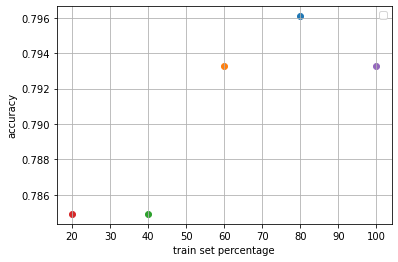

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets, neighbors

train_port = [80, 60, 40, 20]
acc = np.zeros(len(train_port))

num_instances_count = count_sentiment_x_train.shape[0]
for i, p in enumerate(train_port):    
  splitIndex = math.floor(num_instances_count*(p/100))
  count_sentiment_x_train_port = count_sentiment_x_train[:splitIndex]
  count_sentiment_y_train_port = count_sentiment_y_train[:splitIndex]
  model = MultinomialNaiveBayes()
  model.fit(count_sentiment_x_train_port, count_sentiment_y_train_port, alpha=5)
  #eturning an array of numbers y_pred representing the class predicted for each instance
  y_pred = model.predict(count_sentiment_x_test)
  acc[i] = evaluate_acc(count_sentiment_y_test, y_pred)
  plt.scatter(p, acc[i], marker='o');

plt.scatter(100, acc_100, marker='o');
plt.legend()
plt.xlabel('train set percentage')
plt.ylabel('accuracy')
plt.grid(True) 
plt.show()